## Import Library

Kode di bawah adalah import library yang dibutuhkan. `os` digunakan untuk mengelola operasi sistem file, seperti membaca file gambar dari direktori. `cv2` (OpenCV) dipakai untuk memproses dan memanipulasi gambar, seperti membaca atau mengubah format gambar. `matplotlib.pyplot` dan `seaborn` digunakan untuk visualisasi data, seperti menampilkan grafik atau matriks konfusi. `numpy` dan `pandas` mendukung manipulasi data numerik dan tabular, yang penting untuk pengolahan fitur dan analisis data. Pustaka `sklearn` menyediakan alat untuk pembelajaran mesin, termasuk `train_test_split` untuk membagi dataset menjadi data latih dan uji, serta metrik evaluasi seperti `accuracy_score`, `classification_report`, dan `confusion_matrix` untuk mengevaluasi performa model. `graycomatrix` dan `graycoprops` dari `skimage.feature` digunakan untuk ekstraksi fitur tekstur berdasarkan matriks co-occurrence, sedangkan `entropy` dari `scipy.stats` menghitung entropi untuk analisis statistik. Model klasifikasi seperti `RandomForestClassifier`, `SVC` (Support Vector Classifier), dan `KNeighborsClassifier` diimpor untuk membangun dan melatih model pembelajaran mesin. Secara keseluruhan, kode ini menyiapkan alat untuk membaca, memproses, mengekstrak fitur dari gambar, melatih model klasifikasi, dan mengevaluasi hasilnya dengan metrik serta visualisasi yang sesuai.

In [1]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import graycomatrix, graycoprops
from scipy.stats import entropy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
import seaborn as sns

## Data Loading

Kode di bawah mendefinisikan fungsi `resize_image` yang bertujuan untuk mengubah ukuran gambar menggunakan pustaka OpenCV (cv). Fungsi ini menerima dua parameter: `img_path` yaitu, lokasi file gambar dan `size`. Di dalam fungsi, gambar dibaca menggunakan `cv.imread(img_path)`. Jika gambar gagal dibaca, fungsi akan memunculkan pengecualian `ValueError` dengan pesan kesalahan. Jika berhasil, gambar diubah ukurannya menggunakan `cv.resize(img, size)` dan gambar yang telah diubah ukuran dikembalikan. Jika terjadi kesalahan selama proses, blok `except` menangkap pengecualian, mencetak pesan kesalahan, dan mengembalikan `None`. Fungsi ini berguna untuk memproses gambar dengan aman sambil menangani potensi kesalahan.

In [2]:
def resize_image(img_path, size):
    try:
        img = cv.imread(img_path)
        if img is None:
            raise ValueError(f"Image at {img_path} could not be read.")
        resized_img = cv.resize(img, size)
        return resized_img
    except Exception as e:
        print(f"Error resizing image {img_path}: {e}")
        return None

Kode di bawah adalah fungsi `load_dataset` yang digunakan untuk memuat dataset gambar dari direktori tertentu, khususnya dataset "Chest X-Ray Dataset", dan memvisualisasikan distribusi jumlah gambar per kelas dalam bentuk diagram batang. Fungsi ini menerima parameter `dir` yang merupakan jalur direktori dataset. Pertama, fungsi mendefinisikan ukuran gambar standar 250x250 piksel dan membuat list kosong untuk menyimpan  `images` dan `labels`. Selanjutnya, fungsi mengidentifikasi nama-nama kelas dari direktori dengan `os.listdir(dir)` dan membuat kamus `class_counter` untuk melacak jumlah gambar per kelas, dengan batas maksimum 200 gambar per kelas. Untuk setiap kelas, fungsi mengakses direktori kelas tersebut, membaca file gambar, mengubah ukuran gambar menggunakan fungsi `resize_image` dan menyimpan gambar serta labelnya ke dalam list. Jika jumlah gambar per kelas mencapai 200, proses untuk kelas tersebut dihentikan. Setelah semua gambar dimuat, fungsi mengembalikan array NumPy berisi gambar, label, nama kelas, dan kamus penghitung. Bagian kedua kode menampilkan pesan bahwa dataset sedang dimuat, memanggil fungsi `load_dataset`, dan mencetak jumlah total gambar serta jumlah kelas. Terakhir, kode membuat diagram batang menggunakan `seaborn.barplot` untuk memvisualisasikan jumlah gambar per kelas berdasarkan `class_counter`, dengan judul, label sumbu, dan menyimpan grafik sebagai file 'dataset_distribution.png' sebelum menampilkannya menggunakan `plt.show()`.

Loading dataset...
Dataset loaded with 400 images across 2 classes.


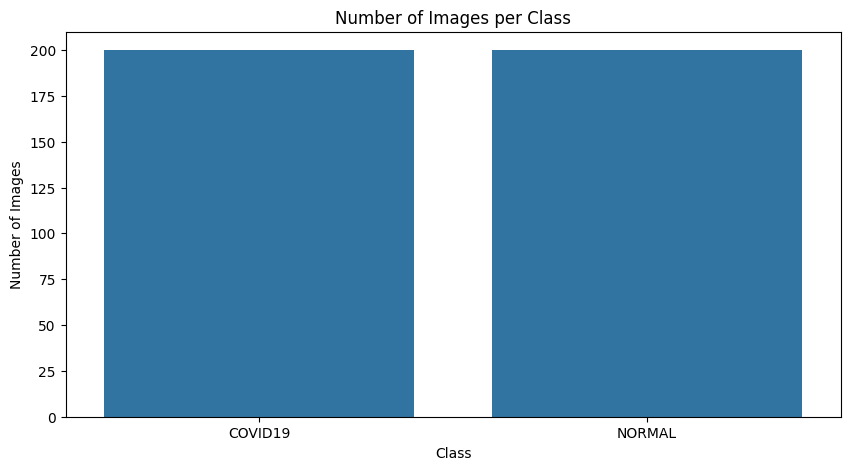

In [3]:
def load_dataset(dir):
    size = (250,250)
    images = []
    labels = []
    class_names = os.listdir(dir)
    class_counter = {class_name: 0 for class_name in class_names}

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(dir, class_name)
        if os.path.isdir(class_dir):
            for file_name in os.listdir(class_dir):
                if class_counter[class_name] >= 200:
                    break
                img_path = os.path.join(class_dir, file_name)
                img = resize_image(img_path, size)
                if img is not None:
                    images.append(img)
                    labels.append(class_name)
                    class_counter[class_name]+=1
    return np.array(images), np.array(labels), class_names, class_counter


print("Loading dataset...")
images, labels, class_names, class_counter = load_dataset('Chest X_Ray Dataset')
print(f"Dataset loaded with {len(images)} images across {len(class_names)} classes.")

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counter.keys()), y=list(class_counter.values()))
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.savefig('dataset_distribution.png')
plt.show()

Kode di bawah adalah fungsi `show_sample_images` digunakan untuk menampilkan contoh gambar dari setiap kelas dalam sebuah dataset. Fungsi ini menerima tiga parameter: `images`, yang berisi kumpulan data gambar; `labels`, yang merupakan label yang sesuai untuk setiap gambar; dan `class_names`, yang merupakan daftar nama-nama kelas. Prosesnya dimulai dengan membuat sebuah figure berukuran 15x10 inci menggunakan matplotlib untuk menampung plot. Kemudian, untuk setiap kelas dalam `class_names`, fungsi ini memfilter gambar-gambar yang memiliki label sesuai dengan kelas tersebut. Gambar tersebut diubah dari format warna BGR ke RGB menggunakan fungsi OpenCV `cvtColor` agar kompatibel dengan matplotlib, lalu subplot diberi judul dengan nama kelas. Setelah semua kelas diproses, tata letak subplot disesuaikan dengan `tight_layout()` dan plot ditampilkan menggunakan `show()`. Dengan demikian, fungsi ini memungkinkan visualisasi satu gambar contoh dari setiap kelas secara terstruktur dalam satu tampilan.

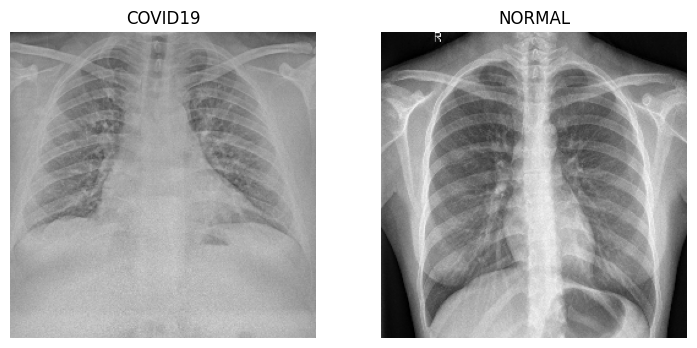

In [4]:
def show_sample_images(images, labels, class_names):
    plt.figure(figsize=(15, 10))
    for i, class_name in enumerate(class_names):
        class_images = images[labels == class_name]
        if len(class_images) > 0:
            plt.subplot(3, 4, i + 1)
            plt.imshow(cv.cvtColor(class_images[10], cv.COLOR_BGR2RGB))
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()
show_sample_images(images, labels, class_names)

### **PreProcessing 2** **(GRAYSCALE, NORMALIZE, EQUALIZATION)**

Kode di bawah adalah grayscale yang menggunakan pustaka OpenCV, kemudian menampilkan sampel gambar tersebut. Pertama, sebuah daftar kosong bernama `img_grey` dibuat untuk menyimpan gambar-gambar yang telah dikonversi. Selanjutnya, melalui perulangan `for`, setiap gambar dalam daftar `images` diubah dari format warna BGR menjadi skala abu-abu menggunakan fungsi `cv.cvtColor(img, cv.COLOR_BGR2GRAY)`. Gambar-gambar grayscale yang dihasilkan kemudian ditambahkan ke daftar `img_grey` menggunakan metode `append`. Setelah semua gambar dikonversi, daftar `img_grey` diubah menjadi array NumPy untuk memudahkan pemrosesan lebih lanjut. Terakhir, fungsi `show_sample_images(img_grey, labels, class_names)` dipanggil untuk menampilkan sampel dari gambar-gambar grayscale tersebut, dengan parameter `labels` dan `class_names` yang digunakan untuk memberikan konteks, seperti kategori atau label kelas dari masing-masing gambar.

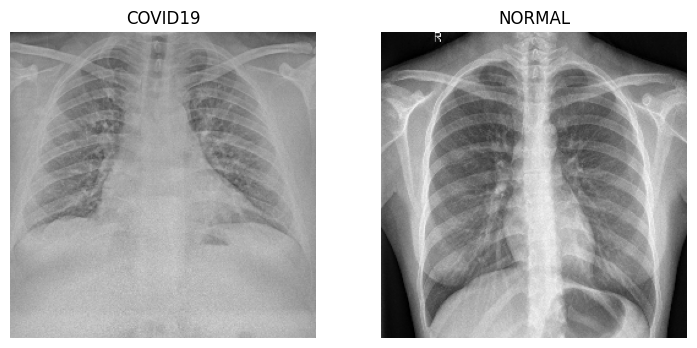

In [5]:
img_grey = []
for img in images:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_grey.append(gray)
img_grey = np.array(img_grey)

show_sample_images(img_grey, labels, class_names)

Kode di bawah adalah fungsi `normalize` bertujuan untuk mengambil sebuah citra `img` dan mengubahnya menjadi tipe data `float32` untuk memastikan presisi dalam perhitungan. Fungsi ini kemudian memeriksa apakah nilai maksimum dan minimum citra berbeda. Jika ya, citra dinormalisasi ke rentang 0 hingga 1 dengan rumus `(img - img.min()) / (img.max() - img.min())`, sehingga skala intensitas piksel seragam. Jika nilai maksimum dan minimum sama, citra diubah menjadi array nol dengan bentuk yang sama. Selanjutnya, kode memproses daftar citra abu-abu `img_grey` secara berulang dengan memanggil fungsi `normalize` untuk setiap citra, lalu menyimpan hasilnya ke dalam daftar `dataPreprocessed`. Setelah normalisasi, citra-citra tersebut diskalakan kembali ke rentang 0 hingga 255 dan diubah ke tipe data `uint8` dengan perintah `[(img * 255).astype(np.uint8) for img in dataPreprocessed]`. Terakhir, fungsi `show_sample_images` dipanggil untuk menampilkan sampel citra yang telah diproses, bersama dengan label dan nama kelasnya.

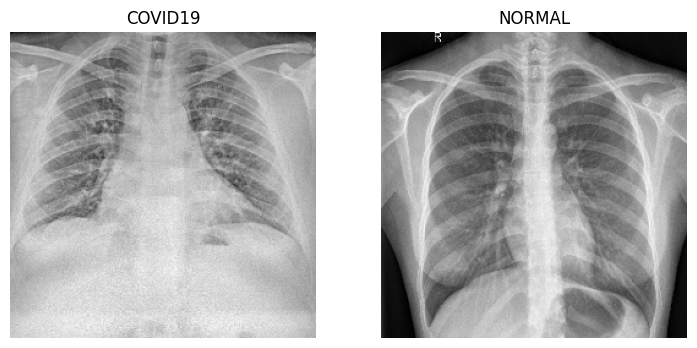

In [6]:
def normalize(img):
    img = img.astype(np.float32)
    if img.max() != img.min():  
        img = (img - img.min()) / (img.max() - img.min())
    else:
        img = np.zeros_like(img)
    return img
dataPreprocessed = []
for i in range(len(img_grey)):
    image = normalize(img_grey[i])
    dataPreprocessed.append(image)
dataPreprocessed = np.array(dataPreprocessed)
data_uint8 = [(img * 255).astype(np.uint8) for img in dataPreprocessed]

show_sample_images(dataPreprocessed, labels, class_names)

Kode di bawah adalah fungsi `equalization(image)` untuk mengambil sebuah gambar dalam format array NumPy dan melakukan pemerataan histogram untuk menyeimbangkan distribusi intensitas piksel, sehingga kontras gambar ditingkatkan. Pertama, kode menghitung histogram intensitas piksel 0 hingga 255 dengan menghitung frekuensi setiap nilai intensitas pada gambar. Kemudian, dihitung dengan menjumlahkan frekuensi dari intensitas 0 hingga i untuk setiap i. Nilai ini kemudian dinormalisasi dan diskalakan ke rentang 0-255 berdasarkan ukuran gambar untuk menghasilkan nilai target `target_value`. Setiap piksel pada gambar asli kemudian dipetakan ke nilai target tersebut, menghasilkan gambar baru `result` dengan kontras yang lebih baik. Bagian kedua dari kode menerapkan fungsi ini pada kumpulan gambar dalam `data_uint8` menggunakan perulangan, menyimpan hasilnya dalam daftar `img_equalization`, dan mengonversinya menjadi array NumPy. Terakhir, fungsi `show_sample_images(img_equalization, labels, class_names)` digunakan untuk menampilkan sampel gambar yang telah diproses beserta label dan nama kelasnya.

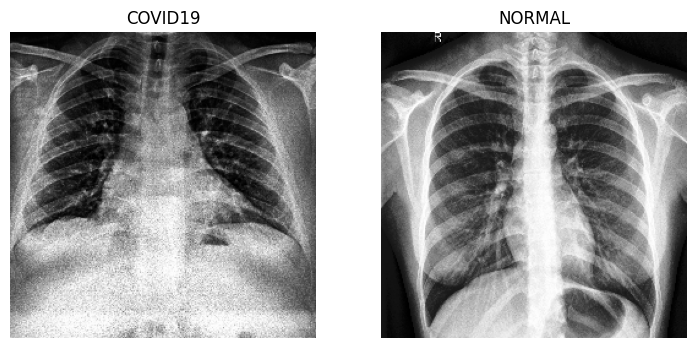

In [7]:
def equalization(image):
    hist = np.zeros(256).astype(int)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            val = image[i, j]
            hist[val] += 1

    gldc = np.zeros(256).astype(int)
    for i in range(256):
        gldc[i] = np.sum(hist[0:i+1])

    target_value = gldc * (256-1) / (height*width)
    target_value = np.floor(target_value).astype(np.uint8)  

    result = np.zeros(image.shape, dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            result[i, j] = target_value[image[i, j]]

    return result

img_equalization = []
for img in data_uint8:
    equalization_img = equalization(img)
    img_equalization.append(equalization_img)
img_equalization = np.array(img_equalization)


show_sample_images(img_equalization, labels, class_names)

### Feature Extraction

Kode di bawah mendefinisikan sebuah fungsi bernama `glcm`. Fungsi ini menerima dua parameter `image`, yaitu citra input dalam bentuk matriks, dan `derajat`, yaitu sudut orientasi untuk menghitung GLCM (0°, 45°, 90°, atau 135°). Pertama, fungsi memeriksa nilai `derajat` yang diberikan dan menetapkan nilai sudut dalam radian ke dalam variabel `angles` sesuai dengan sudut yang dipilih. Jika sudut yang dimasukkan tidak sesuai, fungsi akan memunculkan pesan kesalahan ValueError*. Selanjutnya, fungsi memanggil `graycomatrix` untuk menghitung GLCM dengan parameter citra input, jarak piksel 1, sudut yang telah ditentukan, jumlah level keabuan 256, serta pengaturan `symmetric=True` dan `normed=True`. Hasilnya, fungsi mengembalikan matriks GLCM yang merepresentasikan distribusi intensitas piksel berdasarkan hubungan spasial pada sudut tertentu.

In [8]:
def glcm(image, derajat):
    if derajat == 0:
        angles = [0]
    elif derajat == 45:
        angles = [np.pi / 4]
    elif derajat == 90:
        angles = [np.pi / 2]
    elif derajat == 135:
        angles = [3 * np.pi / 4]
    else:
        raise ValueError("Invalid angle. It should be one of the following: 0, 45, 90, 135.")
    
    glcm = graycomatrix(image, [1], angles, 256, symmetric=True, normed=True)
    return glcm

Kode di bawah adalah fungsi `correlation(matriks)` bertujuan untuk menghitung nilai korelasi dari matriks co-occurrence abu-abu yang diberikan sebagai input. Fungsi ini menggunakan metode `graycoprops` untuk mengekstrak properti statistik dari matriks tersebut. Parameter `correlation` pada fungsi `graycoprops` menunjukkan bahwa properti yang dihitung adalah nilai korelasi, yang mengukur hubungan linier antara intensitas piksel dalam matriks GLCM. Baris kode `[0, 0]` digunakan untuk mengambil nilai korelasi dari array hasil yang dikembalikan oleh `graycoprops`, karena fungsi ini mengembalikan array dua dimensi meskipun hanya satu nilai yang diperlukan.

In [9]:
def correlation(matriks):
	return graycoprops(matriks, 'correlation')[0, 0]

Kode di bawah adalah fungsi `dissimilarity(matriks)` digunakan untuk menghitung nilai dissimilarity dari sebuah matriks, yang biasanya merepresentasikan citra atau data tekstur dalam pemrosesan citra digital. Fungsi ini memanfaatkan metode `graycoprops` untuk menghitung properti statistik dari matriks kuantisasi  abu-abu. Parameter `'dissimilarity'` menunjukkan bahwa properti yang dihitung adalah ukuran ketidaksamaan, yaitu sejauh mana nilai piksel dalam matriks berbeda satu sama lain berdasarkan hubungan spasialnya. Fungsi `graycoprops` mengembalikan array yang berisi nilai properti untuk berbagai sudut atau orientasi, dan `[0, 0]` digunakan untuk mengambil nilai ketidaksamaan dari orientasi pertama. 

In [10]:
def dissimilarity(matriks):
    return graycoprops(matriks, 'dissimilarity')[0, 0]

Kode di bawah adalah fungsi `homogenity(matriks)` dalam kode tersebut digunakan untuk menghitung nilai homogenitas dari sebuah matriks. Fungsi ini memanfaatkan fungsi `graycoprops`. Parameter `matriks` yang dimasukkan ke dalam fungsi ini adalah matriks co-occurrence yang merepresentasikan hubungan spasial antara intensitas piksel dalam citra. Fungsi `graycoprops` kemudian menghitung properti statistik tertentu dari matriks tersebut, dan dalam kasus ini, properti yang dihitung adalah `homogeneity`. Homogenitas mengukur seberapa seragam distribusi intensitas piksel dalam citra, dengan nilai yang lebih tinggi menunjukkan tingkat keseragaman yang lebih besar. Baris kode `[0, 0]` pada akhir fungsi digunakan untuk mengambil nilai homogenitas dari hasil perhitungan `graycoprops`. 

In [11]:
def homogenity(matriks):
    return graycoprops(matriks, 'homogeneity')[0, 0]

Kode di bawah adalah fungsi `contrast(matriks)` bertujuan untuk menghitung nilai kontras dari sebuah matriks citra menggunakan fungsi `graycoprops`. Fungsi ini mengambil parameter `matriks`, yang biasanya merupakan matriks co-occurrence matrix yang merepresentasikan distribusi intensitas piksel dalam citra. Fungsi `graycoprops` kemudian digunakan untuk menghitung properti statistik tertentu, dalam hal ini properti `'contrast'`, yang mengukur variasi intensitas antara piksel-piksel tetangga dalam citra. Nilai kontras menunjukkan seberapa besar perbedaan intensitas antara piksel-piksel tersebut; semakin tinggi nilai kontras, semakin jelas perbedaan antara area terang dan gelap dalam citra. Ekspresi `[0, 0]` pada kode digunakan untuk mengambil nilai kontras dari hasil perhitungan `graycoprops`.

In [12]:
def contrast(matriks):
    return graycoprops(matriks, 'contrast')[0, 0]

Kode di bawah adalah fungsi `ASM(matriks)` untuk menghitung nilai Angular Second Moment (ASM) dari sebuah matriks input. Fungsi ini memanfaatkan fungsi `graycoprops` untuk menghitung properti tekstur dari matriks tersebut. Parameter `'ASM'` menunjukkan bahwa properti yang dihitung adalah ASM, yang mengukur keseragaman distribusi intensitas piksel dalam citra, sering digunakan dalam analisis tekstur untuk mengevaluasi tingkat homogenitas. Matriks `[0, 0]` pada akhir baris kode menunjukkan bahwa fungsi mengambil nilai ASM dari elemen pertama dari hasil perhitungan `graycoprops`, yang biasanya mengembalikan array dua dimensi. 

In [13]:
def ASM(matriks):
    return graycoprops(matriks, 'ASM')[0, 0]

Kode di bawah adalah fungsi `energy` bertujuan untuk menghitung nilai energy dari sebuah matriks. Fungsi ini menggunakan fungsi `graycoprops` untuk mengekstrak properti tekstur dari matriks tersebut. Parameter `matriks` yang diterima fungsi adalah matriks GLCM, yang merepresentasikan distribusi intensitas piksel dalam sebuah gambar. Fungsi `graycoprops` dipanggil dengan argumen `matriks` dan properti `'energy'`, yang menghitung nilai energi berdasarkan matriks tersebut. Energi adalah ukuran tekstur yang menunjukkan keseragaman distribusi intensitas piksel; nilai energi yang tinggi menandakan tekstur yang lebih seragam. Hasil dari `graycoprops` berupa array, dan kode `[0, 0]` digunakan untuk mengambil nilai energi dari elemen pertama array tersebut. 

In [14]:
def energy(matriks):
    return graycoprops(matriks, 'energy')[0, 0]

Kode di bawah adalah fungsi `entropyGlcm(matriks)` digunakan untuk menghitung entropi dari sebuah matriks. Dalam kode ini, parameter `matriks` adalah input berupa matriks dua dimensi yang merepresentasikan distribusi intensitas piksel dalam analisis tekstur gambar. Fungsi ini memanggil metode `entropy` untuk menghitung entropi. Bagian `matriks.ravel()` berfungsi untuk mengubah matriks dua dimensi menjadi array satu dimensi, sehingga dapat diproses oleh fungsi `entropy`. Entropi sendiri adalah ukuran ketidakpastian atau kekacauan dalam distribusi data, yang dalam konteks GLCM menunjukkan seberapa bervariasi hubungan spasial antar piksel dalam gambar. 

In [15]:
def entropyGlcm(matriks):
    return entropy(matriks.ravel())

Kode di atas di bawah adalah bagian dari proses pengolahan citra untuk menghitung matriks GLCM pada citra digital dengan empat sudut orientasi berbeda (0°, 45°, 90°, dan 135°). Pertama, empat daftar kosong `Derajat0`, `Derajat45`, `Derajat90`, `Derajat135` dibuat untuk menyimpan hasil perhitungan GLCM masing-masing sudut. Kemudian, kode melakukan iterasi melalui setiap elemen dalam `img_normalize`, sebagai daftar citra yang telah dinormalisasi. Untuk setiap citra, nilai piksel dinormalisasi dikonversi ke format bilangan bulat 8-bit rentang 0-255 dengan mengalikan nilai piksel dengan 255 dan mengubahnya menjadi tipe data `uint8`. Selanjutnya, fungsi `glcm` dipanggil untuk menghitung matriks GLCM pada citra tersebut dengan sudut orientasi 0°, 45°, 90°, dan 135°, menghasilkan matriks `D0`, `D45`, `D90`, dan `D135`. Hasil perhitungan ini kemudian ditambahkan ke daftar yang sesuai `Derajat0`, `Derajat45`, `Derajat90`, `Derajat135`. 

In [16]:
Derajat0 = []
Derajat45 = []
Derajat90 = []
Derajat135 = []
for i in range(len(img_equalization)):
    D0 = glcm(img_equalization[i], 0)
    D45 = glcm(img_equalization[i], 45)
    D90 = glcm(img_equalization[i], 90)
    D135 = glcm(img_equalization[i], 135)
    Derajat0.append(D0)
    Derajat45.append(D45)
    Derajat90.append(D90)
    Derajat135.append(D135)

Kode di bawah adalah sejumlah daftar kosong untuk menyimpan nilai-nilai fitur tekstur gambar berdasarkan arah tertentu (0°, 45°, 90°, dan 135°). Variabel-variabel tersebut dikelompokkan berdasarkan fitur tekstur seperti kontras, disimilaritas, homogenitas, entropi, ASM, energi, dan korelasi, masing-masing untuk empat arah sudut yang berbeda. Setiap daftar dimaksudkan untuk menyimpan nilai fitur tekstur yang dihitung dari GLCM pada arah tertentu. Misalnya, `Kontras0` akan menyimpan nilai kontras untuk arah 0°, dan begitu pula untuk fitur lainnya. 

In [17]:
Kontras0, Kontras45, Kontras90, Kontras135 = [], [], [], []
dissimilarity0, dissimilarity45, dissimilarity90, dissimilarity135 =  [], [], [], []
homogenity0, homogenity45, homogenity90, homogenity135 = [], [], [], []
entropy0, entropy45, entropy90, entropy135 =  [], [], [], []
ASM0, ASM45, ASM90, ASM135 =  [], [], [], []
energy0, energy45, energy90, energy135 =  [], [], [], []
correlation0, correlation45, correlation90, correlation135 = [], [], [], []


Kode di bawah digunakan untuk menghitung korelasi dari data pada empat sudut derajat yang berbeda (0, 45, 90, dan 135) untuk setiap elemen dalam array `img_normalize`. Kode ini melakukan iterasi sebanyak panjang array `img_normalize` menggunakan perulangan `for` dengan indeks `i`. Pada setiap iterasi, kode menghitung nilai korelasi dari data pada array `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135` yang masing-masing diindeks oleh `i` menggunakan fungsi `correlation`. Hasil perhitungan korelasi untuk masing-masing sudut disimpan dalam variabel `C0`, `C45`, `C90`, dan `C135` kemudian ditambahkan ke dalam daftar yang sesuai, yaitu `correlation0`, `correlation45`, `correlation90`, dan `correlation135`. 

In [18]:
for i in range(len(img_equalization)):
    C0 = correlation(Derajat0[i])
    correlation0.append(C0)
    C45 = correlation(Derajat45[i])
    correlation45.append(C45)
    C90 = correlation(Derajat90[i])
    correlation90.append(C90)
    C135 = correlation(Derajat135[i])
    correlation135.append(C135)

Kode di bawah adalah bagian dari proses pengolahan citra untuk menghitung nilai kontras pada empat sudut derajat (0°, 45°, 90°, dan 135°) dari data citra yang telah dinormalisasi. Dalam kode ini, terdapat perulangan `for` yang mengiterasi sebanyak panjang data `img_normalize`. Pada setiap iterasi, fungsi `contrast()` dipanggil untuk menghitung nilai kontras dari matriks atau data yang terkait dengan sudut tertentu, yaitu `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`. Hasil perhitungan kontras untuk masing-masing sudut disimpan dalam variabel `K0`, `K45`, `K90`, dan `K135`. Kemudian, nilai-nilai tersebut ditambahkan ke dalam daftar yang sesuai, yaitu `Kontras0`, `Kontras45`, `Kontras90`, dan `Kontras135`. 

In [19]:
for i in range(len(img_equalization)):
    K0 = contrast(Derajat0[i])
    K45 = contrast(Derajat45[i])
    K90 = contrast(Derajat90[i])
    K135 = contrast(Derajat135[i])
    Kontras0.append(K0)
    Kontras45.append(K45)
    Kontras90.append(K90)
    Kontras135.append(K135)

Kode di bawah digunakan untuk menghitung nilai disimilaritas dari data pada empat sudut derajat (0, 45, 90, dan 135) untuk setiap elemen dalam daftar `img_normalize`. Dalam kode ini, terdapat perulangan `for` yang iterasi sebanyak panjang dari `img_normalize`. Pada setiap iterasi, fungsi `dissimilarity` dipanggil untuk menghitung nilai disimilaritas dari data pada `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, yang kemungkinan besar merepresentasikan fitur atau matriks pada sudut tertentu. Hasil perhitungan disimilaritas untuk masing-masing sudut disimpan dalam daftar terpisah, yaitu `dissimilarity0`, `dissimilarity45`, `dissimilarity90`, dan `dissimilarity135`. 

In [20]:
for i in range(len(img_equalization)):
    Dis0 = dissimilarity(Derajat0[i])
    Dis45 = dissimilarity(Derajat45[i])
    Dis90 = dissimilarity(Derajat90[i])
    Dis135 = dissimilarity(Derajat135[i])
    dissimilarity0.append(Dis0)
    dissimilarity45.append(Dis45)
    dissimilarity90.append(Dis90)
    dissimilarity135.append(Dis135)

Kode di bawah digunakan untuk menghitung nilai homogenitas pada empat sudut berbeda, yaitu 0°, 45°, 90°, dan 135°. Dalam kode ini, terdapat perulangan `for` yang mengiterasi sebanyak panjang dari `img_normalize`. Pada setiap iterasi, fungsi `homogenity` dipanggil untuk menghitung nilai homogenitas dari matriks `Derajat0[i]`, `Derajat45[i]`, `Derajat90[i]`, dan `Derajat135[i]`, yang masing-masing merepresentasikan matriks co-occurrence pada sudut 0°, 45°, 90°, dan 135°. Hasil perhitungan homogenitas disimpan ke dalam empat daftar terpisah, yaitu `homogenity0`, `homogenity45`, `homogenity90`, dan `homogenity135`, dengan menggunakan metode `append` untuk menambahkan nilai homogenitas `H0`, `H45`, `H90`, `H135` ke masing-masing daftar. 

In [21]:
for i in range(len(img_equalization)):
    H0 = homogenity(Derajat0[i])
    H45 = homogenity(Derajat45[i])
    H90 = homogenity(Derajat90[i])
    H135 = homogenity(Derajat135[i])
    homogenity0.append(H0)
    homogenity45.append(H45)
    homogenity90.append(H90)
    homogenity135.append(H135)

Kode di bawah adalah untuk menghitung nilai entropi pada empat sudut berbeda pada empat arah sudut yang berbeda, yaitu 0°, 45°, 90°, dan 135°. Dalam kode ini, terdapat sebuah perulangan `for` yang mengiterasi sebanyak panjang dari variabel `img_normalize`. Untuk setiap iterasi, kode menghitung entropi dari matriks GLCM pada masing-masing arah sudut menggunakan fungsi `entropyGlcm()`. Nilai entropi untuk arah 0° disimpan dalam variabel `E0`, arah 45° dalam `E45`, arah 90° dalam `E90`, dan arah 135° dalam `E135`. Kemudian, nilai-nilai entropi ini ditambahkan ke dalam daftar yang sesuai, yaitu `entropy0`, `entropy45`, `entropy90`, dan `entropy135`. 

In [22]:
for i in range(len(img_equalization)):  
    E0 = entropyGlcm(Derajat0[i])
    E45 = entropyGlcm(Derajat45[i])
    E90 = entropyGlcm(Derajat90[i])
    E135 = entropyGlcm(Derajat135[i])
    entropy0.append(E0)
    entropy45.append(E45)
    entropy90.append(E90)
    entropy135.append(E135)

Kode di bawah digunakan untuk menghitung dan menyimpan nilai ASM dari empat sudut derajat 0, 45, 90, dan 135 untuk setiap elemen dalam array `img_normalize`. Dalam perulangan tersebut, variabel `i` digunakan sebagai indeks untuk mengakses elemen-elemen dalam array `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135`. Untuk setiap iterasi, fungsi `ASM` dipanggil dengan parameter masing-masing array derajat untuk menghitung nilai ASM pada sudut tertentu. Hasil perhitungan ini kemudian disimpan ke dalam empat daftar terpisah: `ASM0`, `ASM45`, `ASM90`, dan `ASM135`, masing-masing menyimpan nilai ASM untuk sudut 0, 45, 90, dan 135 derajat. 

In [23]:
for i in range(len(img_equalization)):
    A0 = ASM(Derajat0[i])
    A45 = ASM(Derajat45[i])
    A90 = ASM(Derajat90[i])
    A135 = ASM(Derajat135[i])
    ASM0.append(A0)
    ASM45.append(A45)
    ASM90.append(A90)
    ASM135.append(A135)

Kode di bawah digunakan untuk menghitung nilai energi dari empat arah derajat 0, 45, 90, dan 135 untuk setiap elemen dalam daftar `img_normalize`. Dalam kode ini, terdapat perulangan `for` yang berjalan sebanyak panjang dari `img_normalize`. Pada setiap iterasi, fungsi `energy()` dipanggil untuk menghitung energi dari matriks atau data yang tersimpan dalam daftar `Derajat0`, `Derajat45`, `Derajat90`, dan `Derajat135` pada indeks `i`. Hasil perhitungan energi untuk masing-masing arah `ER0`, `ER45`, `ER90`, `ER135` kemudian disimpan ke dalam daftar yang sesuai, yaitu `energy0`, `energy45`, `energy90`, dan `energy135`. 

In [24]:
for i in range(len(img_equalization)):
    ER0 = energy(Derajat0[i])
    ER45 = energy(Derajat45[i])
    ER90 = energy(Derajat90[i])
    ER135 = energy(Derajat135[i])
    energy0.append(ER0)
    energy45.append(ER45)
    energy90.append(ER90)
    energy135.append(ER135)

### Write the extraction's results to CSV 

Kode di bawah digunakan untuk membuat dan menyimpan tabel data yang berisi hasil ekstraksi fitur dari gambar. Pertama, sebuah dictionary bernama `dataTable` dibuat untuk menyimpan berbagai fitur tekstur gambar seperti kontras, homogenitas, disimilaritas, entropi, ASM, energi, dan korelasi, yang dihitung pada empat sudut berbeda 0, 45, 90, dan 135 derajat. Selain itu, dictionary ini juga mencakup kolom `Filename` yang berisi nama file gambar dan kolom `Class` yang menyimpan label kelas dari masing-masing gambar. Dictionary ini kemudian diubah menjadi DataFrame menggunakan pustaka pandas dengan perintah `pd.DataFrame(dataTable)` dan disimpan ke dalam file CSV bernama `hasil_ekstraksi_1.csv` tanpa menyertakan indeks. Selanjutnya, file CSV tersebut dibaca kembali ke dalam variabel `hasilEkstrak` menggunakan `pd.read_csv`. Kolom `Filename` dihapus dari DataFrame karena tidak diperlukan untuk analisis lebih lanjut, dan DataFrame dibagi menjadi dua bagian: `x` yang berisi semua kolom fitur kecuali kolom `Class`, dan `y` yang hanya berisi kolom `Class`. 

In [25]:
dataTable =  {'Filename': [f'Image_{i+1}' for i in range(len(img_equalization))],
        'Class': labels,
        'Contrast0': Kontras0, 'Contrast45': Kontras45, 'Contrast90': Kontras90, 'Contrast135': Kontras135,
        'Homogeneity0': homogenity0, 'Homogeneity45': homogenity45, 'Homogeneity90': homogenity90, 'Homogeneity135': homogenity135,
        'Dissimilarity0': dissimilarity0, 'Dissimilarity45': dissimilarity45, 'Dissimilarity90': dissimilarity90, 'Dissimilarity135': dissimilarity135,
        'Entropy0': entropy0, 'Entropy45': entropy45, 'Entropy90': entropy90, 'Entropy135': entropy135,
        'ASM0': ASM0, 'ASM45': ASM45, 'ASM90': ASM90, 'ASM135': ASM135,
        'Energy0': energy0, 'Energy45': energy45, 'Energy90': energy90, 'Energy135': energy135,
        'Correlation0': correlation0, 'Correlation45': correlation45, 'Correlation90': correlation90, 'Correlation135': correlation135,
        }
df = pd.DataFrame(dataTable)
df.to_csv('hasil_ekstraksi_2.csv', index=False)

hasilEkstrak = pd.read_csv('hasil_ekstraksi_2.csv')
hasilEkstrak = hasilEkstrak.drop(columns=['Filename'])
x = hasilEkstrak.drop(columns=['Class'])
y = hasilEkstrak['Class']


### Features Selection

Kode di bawah digunakan untuk membuat dan menampilkan sebuah matriks korelasi dalam bentuk visualisasi. Pertama, perintah `correlation_matrix = x.corr()` menghitung matriks korelasi dari data yang disimpan dalam variabel `x` yang menunjukkan hubungan korelasi antar kolom numerik dalam data tersebut. Kemudian, `plt.figure(figsize=(20, 16))` mengatur ukuran gambar heatmap menjadi 20x16 inci untuk memastikan visualisasi cukup besar dan jelas. Selanjutnya, `sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)` di mana parameter `annot=True` menampilkan nilai korelasi pada setiap sel, `fmt=".2f"` memformat nilai tersebut hingga dua desimal, `cmap='coolwarm'` menggunakan skema warna merah-biru untuk menunjukkan korelasi positif dan negatif, dan `square=True` memastikan sel berbentuk persegi. Perintah `plt.title('Correlation Matrix')` menambahkan judul "Correlation Matrix" pada heatmap. Terakhir, `plt.savefig('correlation_matrix3.png')` menyimpan heatmap sebagai file gambar bernama 'correlation_matrix3.png', dan `plt.show()` menampilkan visualisasi tersebut di layar. 

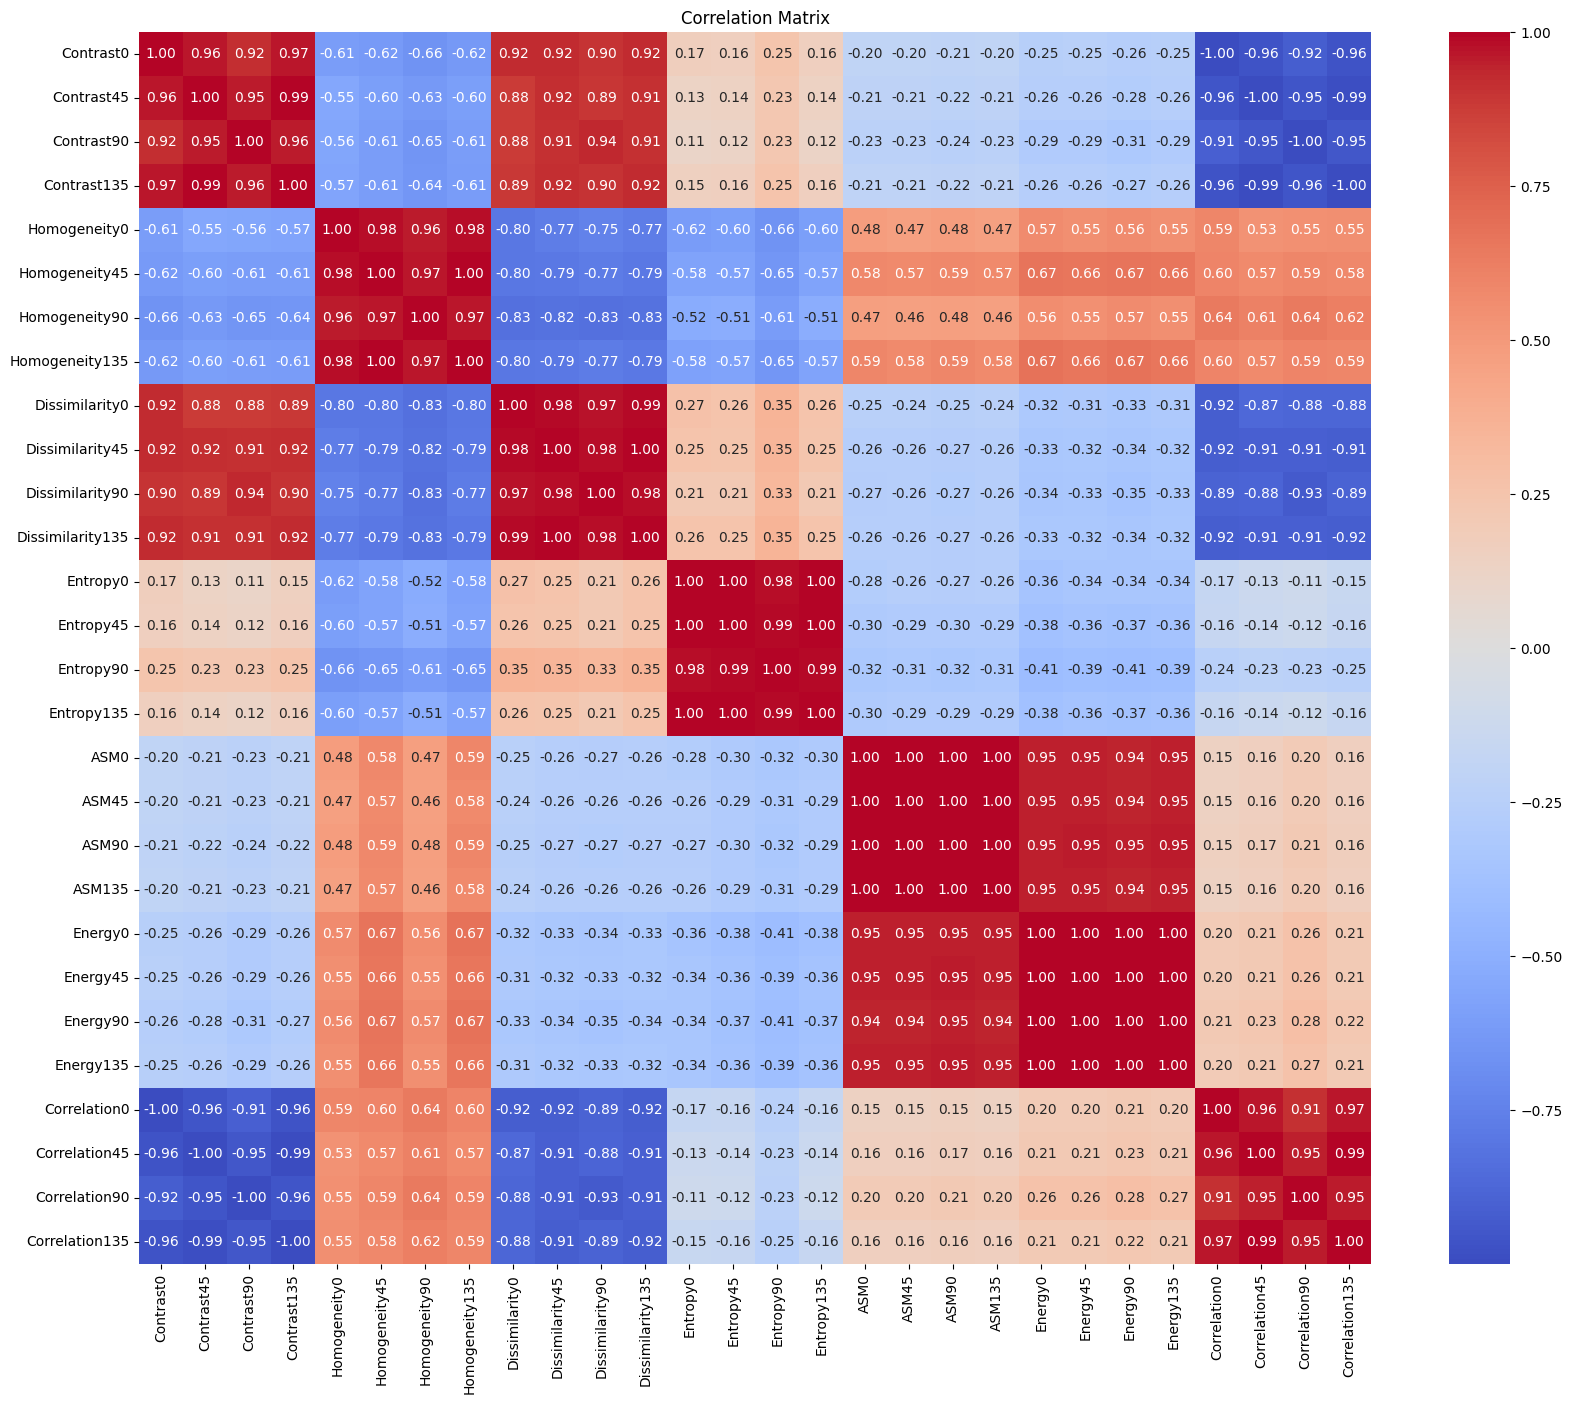

In [26]:
correlation_matrix = x.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix3.png')
plt.show()

## Splitting Data

Kode di bawah adalah fungsi `train_test_split`. Fungsi ini digunakan untuk membagi data menjadi dua bagian, yaitu training set dan test set. Dalam kode tersebut, variabel `x` dan `y` dibagi dengan rasio 70:30, di mana parameter `test_size=0.3` menunjukkan bahwa 30% data akan digunakan sebagai data uji, sedangkan 70% sisanya menjadi data latih. Parameter `random_state=42` memastikan pembagian data dilakukan secara acak tetapi konsisten, sehingga hasilnya dapat direproduksi. Kemudian, kode mencetak jumlah data dalam `x_train`, `x_test` `y_train`, dan `y_test` menggunakan perintah `print` dengan format string untuk menampilkan ukuran masing-masing set data. 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(f"Training set size: {len(x_train)}, Test set size: {len(x_test)}")
print(f"Training set size: {len(y_train)}, Test set size: {len(y_test)}")


Training set size: 280, Test set size: 120
Training set size: 280, Test set size: 120


## Feature Normalization

Kode di bawah adalah fungsi `min_max_scaling` untuk melakukan normalisasi data menggunakan teknik Min-Max Scaling, yang mengubah nilai data ke dalam rentang [0, 1]. Fungsi ini menerima input berupa array data dan menghitung nilai minimum dan maksimum dari data tersebut sepanjang sumbu 0. Selanjutnya, fungsi menerapkan rumus normalisasi `(data - min_val) / (max_val - min_val)` untuk menghasilkan `scaled_data`, yaitu data yang telah dinormalisasi. Dalam kode, fungsi ini digunakan untuk menormalisasi dua set data, yaitu `x_train` dan `x_test`, yang masing-masing disimpan dalam variabel `X_train_normalized` dan `X_test_normalized`. 

In [28]:
def min_max_scaling(data):
    min_val = data.min(axis=0)
    max_val = data.max(axis=0)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

X_train_normalized = min_max_scaling(x_train)
X_test_normalized = min_max_scaling(x_test)

## Modeling

### Define Model

Kode di bawah terdiri dari dua bagian utama yaitu, fungsi `generateClassificationReport` dan inisialisasi tiga model klasifikasi. Fungsi `generateClassificationReport` dibuat untuk mengevaluasi performa model klasifikasi dengan menghasilkan laporan klasifikasi, matriks kebingungan, dan nilai akurasi. Fungsi ini menerima dua parameter, yaitu `y_true` label sebenarnya dan `y_pred` label yang diprediksi model, kemudian mencetak laporan klasifikasi menggunakan `classification_report`, matriks menggunakan `confusion_matrix` yang menunjukkan distribusi prediksi benar dan salah, serta akurasi model dengan `accuracy_score`. Bagian kedua dari kode mendefinisikan tiga model klasifikasi: `rf` (Random Forest Classifier), `svm` (Support Vector Machine), serta `knn` (K-Nearest Neighbors). Ketiga model ini siap digunakan untuk melatih data dan membuat prediksi, yang hasilnya dapat dievaluasi menggunakan fungsi `generateClassificationReport`.

In [29]:
def generateClassificationReport(y_true, y_pred):
	print(classification_report(y_true, y_pred))
	print(confusion_matrix(y_true, y_pred))
	print('Accuracy:', accuracy_score(y_true, y_pred))

rf = RandomForestClassifier(n_estimators=5, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

### Train Random Forest Classifier

Kode di bawah merupakan bagian dari proses Random Forest (rf). Pertama, baris `rf.fit(x_train, y_train)` digunakan untuk melatih model Random Forest dengan data pelatihan, yaitu `x_train` sebagai fitur dan `y_train` sebagai label atau target. Proses ini membuat model mempelajari pola dari data pelatihan. Selanjutnya, model yang telah dilatih digunakan untuk memprediksi label pada data pelatihan dengan perintah `y_pred = rf.predict(x_train)`, dan hasil prediksi ini dievaluasi menggunakan fungsi `generateClassificationReport(y_train, y_pred)` yang menghasilkan laporan klasifikasi, seperti akurasi, presisi, recall, dan F1-score, untuk menilai performa model pada data pelatihan. Proses serupa dilakukan pada data pengujian `x_test` dengan `y_pred = rf.predict(x_test)`, di mana model memprediksi label untuk data yang belum pernah dilihat sebelumnya, lalu laporan klasifikasi dibuat dengan `generateClassificationReport(y_test, y_pred)` untuk mengevaluasi performa model pada data pengujian. 

In [30]:
rf.fit(x_train, y_train)

print("------Training Set------")
y_pred = rf.predict(x_train)
generateClassificationReport( y_train, y_pred)

print("\n------Testing Set------")
y_pred = rf.predict(x_test)
generateClassificationReport( y_test, y_pred)

------Training Set------
              precision    recall  f1-score   support

     COVID19       1.00      0.99      0.99       138
      NORMAL       0.99      1.00      0.99       142

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280

[[136   2]
 [  0 142]]
Accuracy: 0.9928571428571429

------Testing Set------
              precision    recall  f1-score   support

     COVID19       0.94      0.82      0.88        62
      NORMAL       0.83      0.95      0.89        58

    accuracy                           0.88       120
   macro avg       0.89      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120

[[51 11]
 [ 3 55]]
Accuracy: 0.8833333333333333


### Train SVM Classifier

Kode di bawah merupakan bagian dari proses SVM. Pertama, baris `svm.fit(x_train, y_train)` digunakan untuk melatih model SVM dengan data pelatihan, di mana `x_train` adalah fitur-fitur dari data pelatihan dan `y_train` adalah label atau kelas yang sesuai dengan data tersebut. Proses ini memungkinkan model untuk mempelajari pola atau hubungan antara fitur dan label. Selanjutnya, model yang telah dilatih digunakan untuk memprediksi label pada data pelatihan dengan perintah `svm.predict(x_train)`, dan hasil prediksi disimpan dalam variabel `y_pred`. Fungsi `generateClassificationReport(y_train, y_pred)` kemudian dipanggil untuk menghasilkan laporan klasifikasi, seperti akurasi, presisi, recall, dan f1-score, yang mengevaluasi performa model pada data pelatihan. Proses serupa dilakukan pada data pengujian `x_test` dengan `svm.predict(x_test)` untuk mendapatkan prediksi label, lalu laporan klasifikasi dihasilkan dengan `generateClassificationReport(y_test, y_pred)` untuk mengevaluasi performa model pada data pengujian. 

In [31]:
svm.fit(x_train, y_train)

print("\n------Training Set------")
y_pred = svm.predict(x_train)
generateClassificationReport( y_train, y_pred)

print("\n------Testing Set------")
y_pred = svm.predict(x_test)
generateClassificationReport( y_test, y_pred)


------Training Set------
              precision    recall  f1-score   support

     COVID19       0.95      0.61      0.74       138
      NORMAL       0.72      0.97      0.83       142

    accuracy                           0.79       280
   macro avg       0.84      0.79      0.78       280
weighted avg       0.83      0.79      0.79       280

[[ 84  54]
 [  4 138]]
Accuracy: 0.7928571428571428

------Testing Set------
              precision    recall  f1-score   support

     COVID19       0.95      0.66      0.78        62
      NORMAL       0.73      0.97      0.83        58

    accuracy                           0.81       120
   macro avg       0.84      0.81      0.81       120
weighted avg       0.84      0.81      0.80       120

[[41 21]
 [ 2 56]]
Accuracy: 0.8083333333333333


### Train KNN Classifier

Kode di bawah merupakan bagian dari proses KNN. Pertama, perintah `knn.fit(x_train, y_train)` digunakan untuk melatih model KNN dengan data pelatihan, di mana `x_train` dan `y_train` adalah label target dari data pelatihan. Setelah model dilatih, kode mencetak laporan performa untuk data pelatihan dengan memanggil `y_pred = knn.predict(x_train)` untuk memprediksi kelas pada data pelatihan, lalu fungsi `generateClassificationReport(y_train, y_pred)` menghasilkan laporan klasifikasi yang biasanya berisi metrik seperti precision, recall, F1-score, dan accuracy untuk mengevaluasi performa model pada data pelatihan. Selanjutnya, kode melakukan evaluasi pada data pengujian dengan mencetak laporan untuk data uji. Perintah `y_pred = knn.predict(x_test)` memprediksi kelas pada data pengujian (`x_test`), dan hasilnya dievaluasi menggunakan `generateClassificationReport(y_test, y_pred)` untuk menghasilkan laporan klasifikasi yang serupa, tetapi untuk data pengujian `y_test` adalah label sebenarnya. 

In [32]:
knn.fit(x_train, y_train)
print("\n------Training Set------")
y_pred = knn.predict(x_train)
generateClassificationReport( y_train, y_pred)

print("\n------Testing Set------")
y_pred = knn.predict(x_test)
generateClassificationReport( y_test, y_pred)



------Training Set------
              precision    recall  f1-score   support

     COVID19       0.93      0.78      0.85       138
      NORMAL       0.82      0.94      0.88       142

    accuracy                           0.86       280
   macro avg       0.87      0.86      0.86       280
weighted avg       0.87      0.86      0.86       280

[[108  30]
 [  8 134]]
Accuracy: 0.8642857142857143

------Testing Set------
              precision    recall  f1-score   support

     COVID19       0.91      0.79      0.84        62
      NORMAL       0.80      0.91      0.85        58

    accuracy                           0.85       120
   macro avg       0.86      0.85      0.85       120
weighted avg       0.86      0.85      0.85       120

[[49 13]
 [ 5 53]]
Accuracy: 0.85


## Evaluasi Ketiga Model Klasifikasi

Kode di bawah adalah sebuah fungsi bernama `plot_confusion_matrix` yang digunakan untuk membuat dan menampilkan confusion matrix. Fungsi ini menerima tiga parameter: `y_true`, `y_pred`, dan `title`. Di dalam fungsi, matriks konfusi dihitung menggunakan fungsi `confusion_matrix` berdasarkan `y_true` dan `y_pred`. Kemudian, objek `ConfusionMatrixDisplay` dibuat untuk memvisualisasikan matriks konfusi tersebut dengan warna peta `Greens` dari matplotlib. Plot ditampilkan dengan judul yang diberikan melalui parameter `title` menggunakan `plt.title` dan `plt.show`. Kode di luar fungsi memanggil `plot_confusion_matrix` tiga kali untuk menampilkan matriks konfusi dari tiga model berbeda Random Forest (`rf`), SVM (`svm`), dan KNN (`knn`), dengan data `x_test` dan label `y_test`. Setiap pemanggilan menghasilkan plot matriks konfusi dengan judul yang sesuai untuk masing-masing model, seperti "Random Forest Confusion Matrix", "SVM Confusion Matrix", dan "KNN Confusion Matrix".

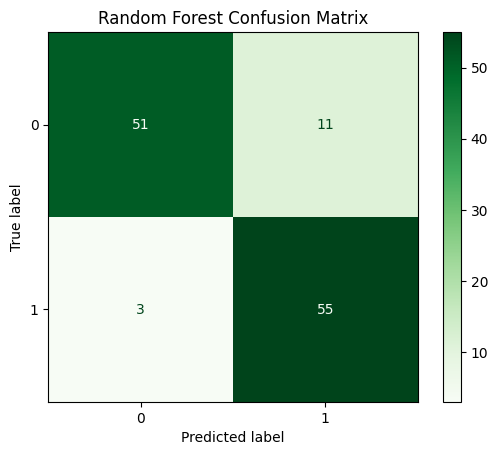

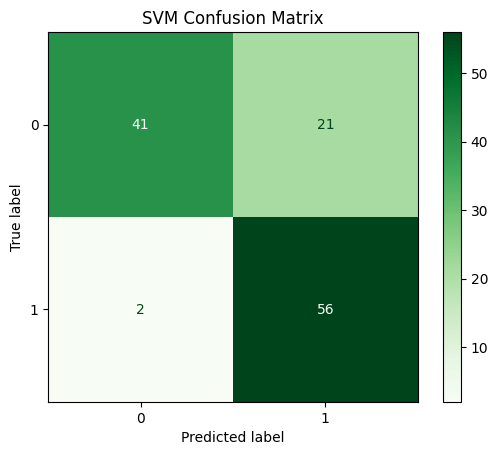

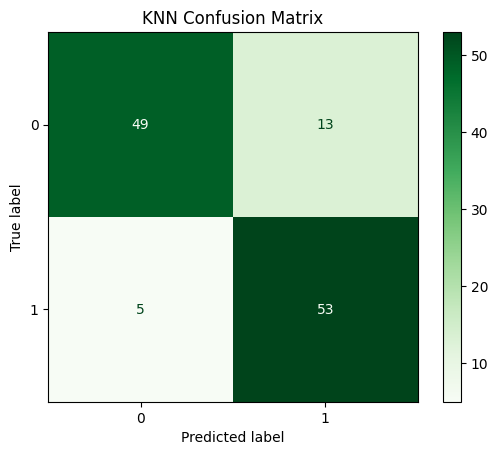

In [33]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Greens)
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, rf.predict(x_test), "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, svm.predict(x_test), "SVM Confusion Matrix")
plot_confusion_matrix(y_test, knn.predict(x_test), "KNN Confusion Matrix")